In [105]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [106]:
# null hypothesis- one categorical
# F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
# red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
# red_wine[red_wine['quality_label'] == 'high']['alcohol'])
# print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
# print('F Statistic:', F, '\tp-value:', p)

## Data Preparatrion

In [107]:
red_wine_heatmap = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_heatmap = pd.read_csv('winequality-white.csv', sep=';')

In [108]:
white_wine_heatmap

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### dropping duplicates and concatinating both datasets

In [109]:
white_wine_heatmap.drop_duplicates(inplace=True)
red_wine_heatmap.drop_duplicates(inplace=True)
white_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.drop(columns='index', inplace=True)
white_wine_heatmap.drop(columns='index', inplace=True)

In [110]:
white_wine_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [111]:
# add column wine type
red_wine_heatmap['wine type']='red'
white_wine_heatmap['wine type']='white'
wine=pd.concat([red_wine_heatmap, white_wine_heatmap], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [112]:
numeric_wine=wine.iloc[:, 0:12]
corr=numeric_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


### add quality label

In [113]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
wine['quality label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['quality label'] = pd.Categorical(wine['quality label'],
categories=['low', 'medium', 'high'])
# wine.drop('quality_label',inplace=True, axis=1)

In [114]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


### anova test to find out which features do not play a role

In [115]:
def anova_tests2(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        F, p = stats.f_oneway(
            df[df['quality label'] == 'low'][feature],
            df[df['quality label'] == 'medium'][feature],
            df[df['quality label'] == 'high'][feature]
        )
        if p > 0.05:
         print(f"ANOVA test for mean {feature} across wine samples with different quality ratings")
         print('F Statistic:', F, '\tp-value:', p)
        else:
         print("there is correlation")

In [116]:
anova_tests2(wine)


there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation


### encoding wine type

In [117]:
# changing wine type to 0 and 1
wine1=wine.copy()

In [118]:
wine1['wine type'].replace(['red', 'white'],
                        [0, 1], inplace=True)

In [119]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,low


### encoding quality label

In [120]:
from sklearn.preprocessing import OrdinalEncoder
# Create an instance of OrdinalEncoder

In [121]:
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
wine1['NumericalLabels'] = ordinal_encoder.fit_transform(wine1[['quality label']])

In [122]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label,NumericalLabels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,low,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,low,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,low,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,medium,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,low,0.0


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_outlier_bounds(data):
    """
    Calculate upper and lower bounds for outliers using the interquartile range (IQR) method.
    
    Parameters:
    - data: A pandas Series or DataFrame containing numerical data.
    
    Returns:
    - upper_bound: Upper bound for outliers.
    - lower_bound: Lower bound for outliers.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    return upper_bound, lower_bound

def plot_outlier_counts(data):
    """
    Plot the count of outliers per feature.
    
    Parameters:
    - data: A pandas DataFrame containing numerical data.
    """
    # Calculate outliers for each feature
    upper_bound, lower_bound = calculate_outlier_bounds(data)
    outliers_count = (data > upper_bound) | (data < lower_bound)
    outliers_per_feature = outliers_count.sum()
    
    # Plotting
    sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
    plt.figure(figsize=(10, 6))
    sns.barplot(x=outliers_per_feature.index, y=outliers_per_feature.values)
    plt.title('Count of Outliers per Feature', color='white')
    plt.xlabel('Feature', color='white')
    plt.ylabel('Number of Outliers', color='white')
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(fontsize=10, color='white')
    # Add count labels on top of bars
    for i, count in enumerate(outliers_per_feature.values):
        plt.text(i, count + 0.1, str(count), ha='center', color='white')
    plt.tight_layout()
    plt.show()

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
data = wine1

# Plot the count of outliers per feature
plot_outlier_counts(data)

AssertionError: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate outliers for each feature
outliers_count = (data > upper_bound) | (data < lower_bound)
outliers_per_feature = outliers_count.sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=outliers_per_feature.index, y=outliers_per_feature.values)
plt.title('Count of Outliers per Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'upper_bound' is not defined

### dropping unnecessary columns

In [ ]:
wine1.drop(columns='quality', inplace=True)

In [ ]:
wine1.drop(columns='quality label', inplace=True)

In [ ]:
wine1.drop(columns='wine type', inplace=True)


In [ ]:
wine3=wine1.copy()

In [ ]:
wine4=wine1.copy()

In [ ]:
wine3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,NumericalLabels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0


## Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

In [ ]:
#importm library for dicidint the dataset into two 
from sklearn.model_selection import train_test_split

In [ ]:
wine4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,NumericalLabels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0


### dividing into X and y

In [ ]:
wine3.drop(columns='NumericalLabels', inplace=True)

In [ ]:

y=wine4['NumericalLabels'] # --> what you're trying to predict
X=wine3 # --> the features we will keep to build our model

In [ ]:
wine3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
X.shape

(5320, 11)

In [ ]:
y.shape

(5320,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [ ]:
y_test.shape

(1064,)

In [ ]:
y_train

521     0.0
757     0.0
4435    1.0
3342    0.0
4117    1.0
       ... 
4149    1.0
1890    1.0
350     1.0
79      0.0
3927    1.0
Name: NumericalLabels, Length: 4256, dtype: float64

In [ ]:
# Display class distribution before oversampling
print("Class Distribution Before SMOTE (Training Set):", Counter(y_train))

Class Distribution Before SMOTE (Training Set): Counter({1.0: 2565, 0.0: 1574, 2.0: 117})


In [ ]:
# Apply SMOTE for oversampling only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Display class distribution after oversampling
print("Class Distribution After SMOTE (Training Set):", Counter(y_train_resampled))

Class Distribution After SMOTE (Training Set): Counter({0.0: 2565, 1.0: 2565, 2.0: 2565})


# Models

## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF_model= RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=445)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create a StratifiedKFold object with k=5 (you can adjust the number of folds)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(RF_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cross_val_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean Accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard Deviation: {cross_val_scores.std():.2f}")

Cross-Validation Scores:
[0.76597744 0.73120301 0.72650376 0.7424812  0.7537594 ]

Mean Accuracy: 0.74
Standard Deviation: 0.01


In [ ]:
RF_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=445)

In [ ]:
preds2= RF_model.predict(X_test)

In [ ]:
preds2

array([0., 0., 1., ..., 1., 0., 2.])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
acc=accuracy_score(y_test, preds2)
acc

0.7077067669172933

## RESULTS

In [ ]:
accuracy = accuracy_score(y_test, preds2)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, preds2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds2))

Accuracy: 0.7077067669172933

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       414
         1.0       0.78      0.70      0.74       614
         2.0       0.21      0.31      0.25        36

    accuracy                           0.71      1064
   macro avg       0.56      0.59      0.57      1064
weighted avg       0.72      0.71      0.71      1064


Confusion Matrix:
[[313 100   1]
 [144 429  41]
 [  1  24  11]]


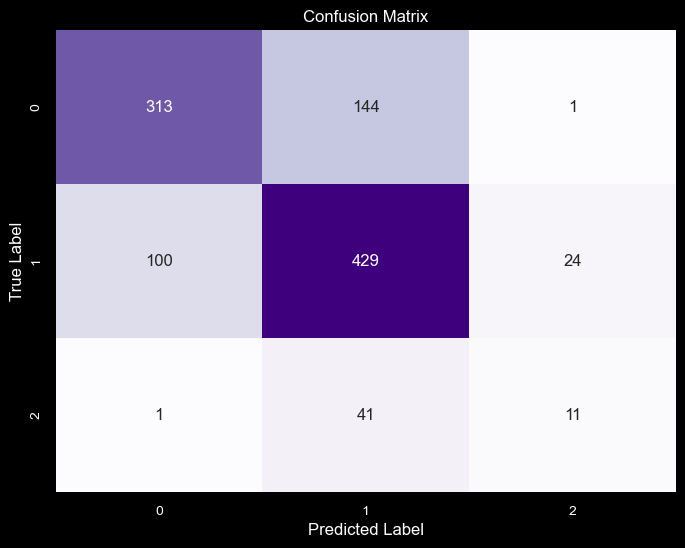

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Compute confusion matrix
cm = confusion_matrix(preds2, y_test)
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.title('Confusion Matrix', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.show()

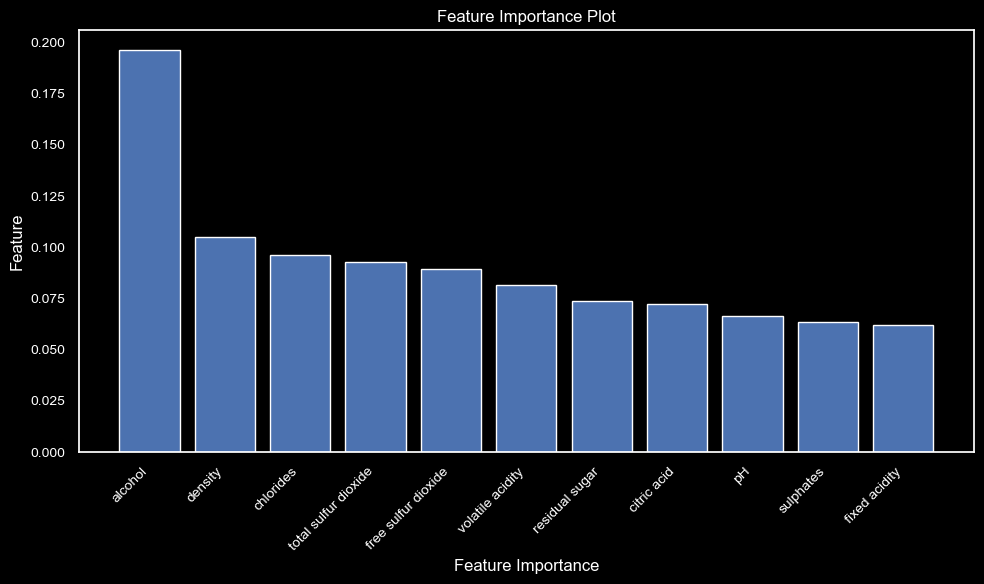

In [ ]:
# Feature Importance Plot
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
plt.figure(figsize=(10, 6))
feat_importances = RF_model.feature_importances_
feat_names = wine4.columns[:-1]
indices = np.argsort(feat_importances)[::-1]
plt.bar(range(X.shape[1]), feat_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feat_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Feature Importance', color='white')
plt.ylabel('Feature', color='white')
plt.title('Feature Importance Plot', color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.tight_layout()
plt.show()

## KNN

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Initialize Min-Max scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
k = 5  # You can adjust this value based on your problem
knn_model = KNeighborsClassifier(n_neighbors=k)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create a StratifiedKFold object with k=5 (you can adjust the number of folds)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(knn_model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cross_val_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean Accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard Deviation: {cross_val_scores.std():.2f}")

Cross-Validation Scores:
[0.62781955 0.625      0.59304511 0.60056391 0.62406015]

Mean Accuracy: 0.61
Standard Deviation: 0.01


In [ ]:
knn_model.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn_model.predict(X_test_scaled)

## RESULTS

In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.5930451127819549

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67       414
         1.0       0.73      0.51      0.60       614
         2.0       0.12      0.50      0.19        36

    accuracy                           0.59      1064
   macro avg       0.49      0.58      0.49      1064
weighted avg       0.67      0.59      0.61      1064


Confusion Matrix:
[[298 103  13]
 [175 315 124]
 [  2  16  18]]


## Support Vector Machines (SVM)

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [ ]:
X.shape

(5320, 11)

In [ ]:
y.shape

(5320,)

In [ ]:

# Standardize the features (important for SVM)
scaler = StandardScaler() 
# scaler = MinMaxScaler() 
X_train_transformed = scaler.fit_transform(X_train_resampled)
X_test_transformed = scaler.transform(X_test)

In [ ]:
X_train_transformed.shape

(7695, 11)

In [ ]:
y_train_resampled.shape

(7695,)

In [ ]:
X_test_transformed.shape

(1064, 11)

In [ ]:
y_test.shape

(1064,)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
# Define your SVM model with desired parameters
svm_model = SVC(kernel='linear', C=1.0)

# Initialize stratified k-fold cross-validation with 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate over each fold and train/test the model
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the SVM model on the training data
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    svm_pred = svm_model.predict(X_test)
    
    # Calculate accuracy and store the score
    accuracy = accuracy_score(y_test, svm_pred)
    accuracy_scores.append(accuracy)

# Compute the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

In [ ]:


# Train the SVM classifier
svm_classifier.fit(X_train_transformed, y_train_resampled)

# Make predictions on the test set
prediction4 = svm_classifier.predict(X_test_transformed)

## RESULT

In [ ]:
# Evaluate the performance of the classifier
accuracy4 = accuracy_score(y_test, prediction4)
report4 = classification_report(y_test, prediction4)

# Print the results
print(f"Accuracy: {accuracy4:.2f}")
print("\nClassification Report:\n", report4)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction4))

Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       414
         1.0       0.75      0.42      0.54       614
         2.0       0.12      0.78      0.20        36

    accuracy                           0.56      1064
   macro avg       0.50      0.65      0.48      1064
weighted avg       0.69      0.56      0.59      1064


Confusion Matrix:
[[310  80  24]
 [168 259 187]
 [  0   8  28]]
